In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [8]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [4]:
base = base.drop(columns= ['Unnamed: 0'])
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [5]:
base.shape

(20000, 27)

In [57]:
y = base.iloc[:,7].values
x = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [58]:
print(y)

['EggShell' 'Football' 'Football' ... 'Football' 'Football' 'Tank']


In [59]:
print(x)

[[1 False 'Adult' ... 'Poor' False 'Thousand']
 [2 False 'Senior' ... 'Good' True 'Thousand']
 [3 False 'Senior' ... 'Good' True 'Thousand']
 ...
 [19998 False 'Senior' ... 'Excellent' True 'Thousand']
 [19999 False 'Adult' ... 'Good' True 'Thousand']
 [20000 False 'Adult' ... 'Excellent' True 'Thousand']]


In [60]:
encoder = LabelEncoder()

In [61]:
for i in range(x.shape[1]):
  if x[:,i].dtype == 'object':
    x[:,i] = encoder.fit_transform(x[:,i])

print(x)

[[0 0 1 ... 3 0 3]
 [1 0 2 ... 2 1 3]
 [2 0 2 ... 2 1 3]
 ...
 [19997 0 2 ... 0 1 3]
 [19998 0 1 ... 2 1 3]
 [19999 0 1 ... 0 1 3]]


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [77]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [78]:
predictions = model.predict(x_test)
print(predictions)

['Football' 'EggShell' 'EggShell' ... 'Tank' 'Tank' 'EggShell']


In [79]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = (f1_score(y_test, predictions, average='weighted'))
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


Accuracy: 0.6635, Precision: 0.6617444861453643, Recall: 0.6635, F1: 0.6575353294874395


In [80]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

    EggShell       0.76      0.80      0.78      2948
    Football       0.59      0.45      0.51      2073
        Tank       0.53      0.70      0.60       979

    accuracy                           0.66      6000
   macro avg       0.62      0.65      0.63      6000
weighted avg       0.66      0.66      0.66      6000



0.6635

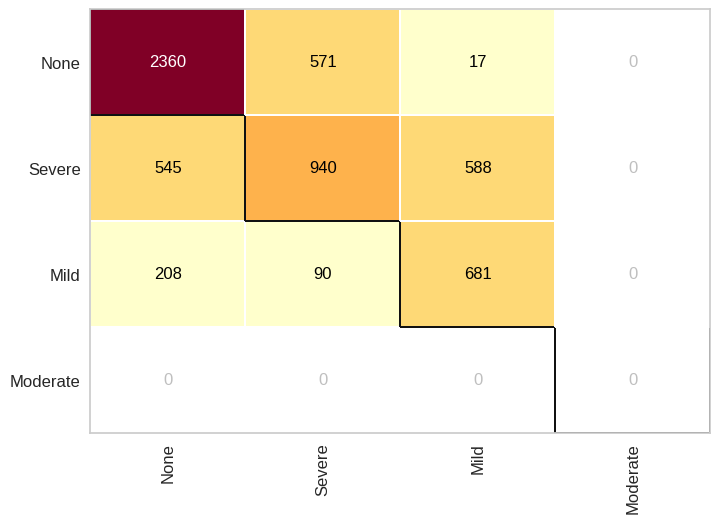

In [81]:
cm = ConfusionMatrix(model, classes=['None', 'Severe', 'Mild', 'Moderate'])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)